- Thiết lập

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = 'https://www.leagueoflegends.com/vi-vn/news/'

In [ ]:
page = requests.get(url)

In [ ]:
soup = BeautifulSoup(page.text, 'html')

In [ ]:
a = soup.find_all(class_='mhgame-result')

- Kiểm tra xem gom được tới được nhưng cột nào

In [ ]:
for i in a:
  print(i.text)

2025-08-09
KR LCK 2025 Rounds 3-5
25.15
Win
2025-08-09
KR LCK 2025 Rounds 3-5
25.15
Win
2025-08-07
KR LCK 2025 Rounds 3-5
25.15
Loss
2025-08-07
KR LCK 2025 Rounds 3-5
25.15
Loss
2025-08-07
KR LCK 2025 Rounds 3-5
25.15
Win
2025-08-02
KR LCK 2025 Rounds 3-5
25.14
Win
2025-08-02
KR LCK 2025 Rounds 3-5
25.14
Win
2025-07-30
KR LCK 2025 Rounds 3-5
25.14
Win
2025-07-30
KR LCK 2025 Rounds 3-5
25.14
Win
2025-07-27
KR LCK 2025 Rounds 3-5
25.14
Win
2025-07-27
KR LCK 2025 Rounds 3-5
25.14
Win
2025-07-25
KR LCK 2025 Rounds 3-5
25.14
Win
2025-07-25
KR LCK 2025 Rounds 3-5
25.14
Win
2025-07-25
KR LCK 2025 Rounds 3-5
25.14
Loss
2025-07-20
INT Esports World Cup 2025
25.13
Win
2025-07-20
INT Esports World Cup 2025
25.13
Win
2025-07-19
INT Esports World Cup 2025
25.13
Loss
2025-07-19
INT Esports World Cup 2025
25.13
Loss
2025-07-18
INT Esports World Cup 2025
25.13
Win
2025-07-18
INT Esports World Cup 2025
25.13
Loss
2025-07-18
INT Esports World Cup 2025
25.13
Win
2025-07-13
INT MSI 2025
25.13
Loss
2025-07

- Bắt đầu

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://lol.fandom.com/wiki/T1/Match_History"
resp = requests.get(url)
soup = BeautifulSoup(resp.content, "html.parser")

rows = soup.select("table tr")
matches = []

for row in rows:
    result_cell = row.find(class_="mhgame-result")
    if result_cell:
        cells = row.find_all("td")
        match_data = []
        for c in cells:
            text = c.get_text(strip=True)


            if not text:  # nếu trống thì thử lấy alt/title
                img = c.find("img")
                if img:
                    if img.has_attr("alt") and img["alt"].strip():
                        text = img["alt"].strip()
                    elif img.has_attr("title") and img["title"].strip():
                        text = img["title"].strip()

            # Nếu vẫn trống, gán ""
            if not text:
                text = ""


            match_data.append(text)
        matches.append(match_data)

for m in matches:
    print(m)

['2025-08-09', 'KRLCK 2025 Rounds 3-5', '25.15', 'Win', 'Red', '\u2060\u2060', '', '', '', '', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB', 'VOD']
['2025-08-09', 'KRLCK 2025 Rounds 3-5', '25.15', 'Win', 'Red', '\u2060\u2060', '', '', '', '', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB', 'VOD']
['2025-08-07', 'KRLCK 2025 Rounds 3-5', '25.15', 'Loss', 'Blue', '\u2060\u2060', '', '', '', '', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB', 'VOD']
['2025-08-07', 'KRLCK 2025 Rounds 3-5', '25.15', 'Loss', 'Red', '\u2060\u2060', '', '', '', '', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB', 'VOD']
['2025-08-07', 'KRLCK 2025 Rounds 3-5', '25.15', 'Win', 'Red', '\u2060\u2060', '', '', '', '', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB', 'VOD']
['2025-08-02', 'KRLCK 2025 Rounds 3-5', '25.14', 'Win', 'Red', '\u2060\u2060', '', '', '', '', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB', 'VOD']
['2025-08-02', 'KRLCK 2025 Rounds 3-5', '25.14', 'Win', 'Blue', '\u2060\u2060', '', '', '', '', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB', 'V

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

def clean_text(text):
    # Loại bỏ ký tự khoảng trắng vô hình và chuẩn hóa khoảng trắng
    text = re.sub(r'[\u200B-\u200D\u2060]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

url = "https://lol.fandom.com/wiki/T1/Match_History"
resp = requests.get(url)
soup = BeautifulSoup(resp.content, "html.parser")

rows = soup.select("table tr")
matches = []

for row in rows:
    result_cell = row.find(class_="mhgame-result")
    if result_cell:
        cells = row.find_all("td")
        match_data = []
        for idx, c in enumerate(cells):
            parts = []

            # Lấy text trong ô và làm sạch
            text = clean_text(c.get_text(strip=True))

            # Nếu là cột Players (giả sử index 10), chỉ lấy text thuần
            if idx == 10:
                if text:
                    parts.append(text)
            else:
                if text:
                    parts.append(text)

                # Lấy title trong các <a>
                for a in c.find_all("a"):
                    if a.has_attr("title"):
                        t = clean_text(a["title"])
                        if t and t not in parts:
                            parts.append(t)

                # Lấy alt trong các <img>      # đoạn này xóa cũng được vì kh có img nào trong alt
                for img in c.find_all("img"):
                    if img.has_attr("alt"):
                        t = clean_text(img["alt"])
                        if t and t not in parts:
                            parts.append(t)

                # Lấy title trong các <span>
                for span in c.find_all("span"):
                    if span.has_attr("title"):
                        t = clean_text(span["title"])
                        if t and t not in parts:
                            parts.append(t)

            match_data.append(", ".join(parts))
        matches.append(match_data)

for m in matches:
    print(m)


['2025-08-09', 'KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5', '25.15, Patch 25.15', 'Win', 'Red', 'Nongshim RedForce', 'Pantheon, Azir, Yunara, Shen, Nautilus', 'Taliyah, Vi, Varus, Bard, Neeko', 'Ambessa, Xin Zhao, Galio, Sivir, Poppy', 'Gwen, Wukong, Corki, Kalista, Renata Glasc', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Week 12 (2)', 'VOD']
['2025-08-09', 'KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5', '25.15, Patch 25.15', 'Win', 'Red', 'Nongshim RedForce', 'Pantheon, Azir, Yunara, Rakan, Nautilus', 'Vi, Wukong, Varus, Neeko, Bard', 'Aurora, Nocturne, Orianna, Jhin, Alistar', 'Rumble, Trundle, Ryze, Xayah, Lulu', 'Doran,Oner,Faker,Gumayusi,Keria', 'SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Week 12 (2)', 'VOD']
['2025-08-07', 'KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5', '25.15, Patch 25.15', 'Loss', 'Blue', 'Gen.G', 'Taliyah, Yone, Alistar, Twisted Fate, Renekton', 'Azir, Varus, Pantheon, Caitlyn, Miss Fortune', 'Jax, Nocturne, Sylas, Xayah, Neek

- Chuyển thành Dataframe

In [ ]:
import pandas as pd
# Chuyển danh sách thành DataFrame
df = pd.DataFrame(matches, columns=["Date", "Tournament", "P", "W/L", "Side", "Vs", "Bans", "Bans Vs", "Picks", "Picks Vs", "Players", "SB", "VOD"])

In [ ]:
df

,Date,Tournament,P,W/L,Side,Vs,Bans,Bans Vs,Picks,Picks Vs,Players,SB,VOD
0,2025-08-09,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Win,Red,Nongshim RedForce,"Pantheon, Azir, Yunara, Shen, Nautilus","Taliyah, Vi, Varus, Bard, Neeko","Ambessa, Xin Zhao, Galio, Sivir, Poppy","Gwen, Wukong, Corki, Kalista, Renata Glasc","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
1,2025-08-09,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Win,Red,Nongshim RedForce,"Pantheon, Azir, Yunara, Rakan, Nautilus","Vi, Wukong, Varus, Neeko, Bard","Aurora, Nocturne, Orianna, Jhin, Alistar","Rumble, Trundle, Ryze, Xayah, Lulu","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
2,2025-08-07,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Loss,Blue,Gen.G,"Taliyah, Yone, Alistar, Twisted Fate, Renekton","Azir, Varus, Pantheon, Caitlyn, Miss Fortune","Jax, Nocturne, Sylas, Xayah, Neeko","Yorick, Vi, Corki, Ziggs, Nautilus","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
3,2025-08-07,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Loss,Red,Gen.G,"Pantheon, Varus, Azir, Ornn, Alistar","Neeko, Xayah, Vi, Corki, Poppy","Rumble, Jarvan IV, Orianna, Lucian, Nami","Ambessa, Xin Zhao, Galio, Yunara, Rakan","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
4,2025-08-07,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Win,Red,Gen.G,"Pantheon, Azir, Varus, Rakan, Alistar","Neeko, Taliyah, Xin Zhao, Poppy, Yunara","Aurora, Trundle, Ryze, Jhin, Bard","Gwen, Wukong, Annie, Sivir, Rell","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
5,2025-08-02,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.14, Patch 25.14",Win,Red,Hanwha Life Esports,"Pantheon, Varus, Aurora, Jayce, Xin Zhao","Rumble, Ryze, Nocturne, Aphelios, Corki","K'Sante, Trundle, Taliyah, Sivir, Neeko","Aatrox, Maokai, Azir, Senna, Alistar","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
6,2025-08-02,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.14, Patch 25.14",Win,Blue,Hanwha Life Esports,"Yone, Taliyah, Aurora, Alistar, Sivir","Pantheon, Varus, Azir, Neeko, Poppy","Gwen, Jarvan IV, Galio, Jhin, Bard","Ambessa, Wukong, Orianna, Lucian, Rakan","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
7,2025-07-30,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.14, Patch 25.14",Win,Red,KT Rolster,"Pantheon, Azir, Trundle, Alistar, Jarvan IV","Annie, Taliyah, Aurora, Bard, Jhin","Gwen, Nocturne, Galio, Xayah, Rakan","Jax, Skarner, Viktor, Varus, Poppy","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
8,2025-07-30,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.14, Patch 25.14",Win,Red,KT Rolster,"Pantheon, Gwen, Azir, Rakan, Alistar","Varus, Annie, Taliyah, Poppy, Bard","Ornn, Xin Zhao, Ryze, Sivir, Neeko","Rumble, Wukong, Cassiopeia, Corki, Nautilus","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
9,2025-07-27,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.14, Patch 25.14",Win,Red,Nongshim RedForce,"Pantheon, Sejuani, Azir, Camille, Alistar","Xin Zhao, Vi, Trundle, Caitlyn, Thresh","Ambessa, Nocturne, Orianna, Jhin, Bard","K'Sante, Viego, Galio, Senna, Tahm Kench","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD


In [ ]:
with open("match_history.csv", mode="w", encoding="utf-8", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(columns)  # ghi header
    for row in matches:
        # Nếu row thiếu cột, bạn có thể pad thêm "" cho đủ cột
        if len(row) < len(columns):
            row += [""] * (len(columns) - len(row))
        writer.writerow(row)

---

- Gộp 8 file lại sau khi cào về

In [ ]:
import pandas as pd

In [ ]:
files = ["match_history.csv", "match_history (1).csv", "match_history (2).csv", "match_history (3).csv", "match_history (4).csv", "match_history (5).csv", "match_history (6).csv", "match_history (7).csv","match_history (8).csv"]

In [ ]:
# Đọc các file vào list dataframe
dfs = [pd.read_csv(f) for f in files]

# Gộp các dataframe lại
df_all = pd.concat(dfs, ignore_index=True)

# Lưu file kết quả
df_all.to_csv("merged_file.csv", index=False, encoding="utf-8-sig")

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        450 non-null    object
 1   Tournament  450 non-null    object
 2   P           450 non-null    object
 3   W/L         450 non-null    object
 4   Side        450 non-null    object
 5   Vs          450 non-null    object
 6   Bans        450 non-null    object
 7   Bans Vs     450 non-null    object
 8   Picks       450 non-null    object
 9   Picks Vs    450 non-null    object
 10  Players     450 non-null    object
 11  SB          450 non-null    object
 12  VOD         431 non-null    object
dtypes: object(13)
memory usage: 45.8+ KB


- Sắp xếp cột Date theo thứ tự tăng dần, nhưng vì là dạng object nên khi chuyển thành datetime thì sẽ có một số cột tuy nhìn file csv thì bình thường nhưng khi chuyển thì lại mất trắng => mất dữ liệu. Nên đã sắp xếp thứ tự trong excel.


In [ ]:
df = pd.read_csv("merged_file.csv")

In [ ]:
df.head()

,Date,Tournament,P,W/L,Side,Vs,Bans,Bans Vs,Picks,Picks Vs,Players,SB,VOD
0,14/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Win,Red,"Fredit BRION, Fredit BRIONlogo std.png","Lee Sin, Renekton, Camille, LeBlanc, None","Yuumi, Caitlyn, Twisted Fate, Viktor, Ryze","Gwen, Jarvan IV, Vex, Aphelios, Lulu","Gragas, Xin Zhao, Corki, Varus, Karma","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
1,14/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Win,Blue,"Fredit BRION, Fredit BRIONlogo std.png","Lee Sin, LeBlanc, Twisted Fate, Leona, Yuumi","Karma, Caitlyn, Renekton, Graves, Lulu","Gnar, Xin Zhao, Viktor, Aphelios, Nautilus","Gragas, Viego, Ryze, Jhin, Sett","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
2,14/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Loss,Red,"Fredit BRION, Fredit BRIONlogo std.png","Renekton, Lee Sin, Karma, Gragas, LeBlanc","Yuumi, Caitlyn, Twisted Fate, Viego, Jarvan IV","Jayce, Nidalee, Ryze, Jhin, Rakan","Camille, Xin Zhao, Galio, Varus, Leona","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
3,20/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Win,Blue,"DRX, DRXlogo std.png","Graves, Caitlyn, Renekton, Rakan, Leona","Karma, Yuumi, Twisted Fate, Thresh, Jhin","Fiora, Viego, Corki, Aphelios, Gragas","Camille, Jarvan IV, Vex, Ziggs, Rell","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
4,20/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Win,Red,"DRX, DRXlogo std.png","Renekton, Twisted Fate, Caitlyn, Gragas, Thresh","Yuumi, Karma, Jarvan IV, Ziggs, Leona","Camille, Diana, Tryndamere, Samira, Rakan","Gwen, Xin Zhao, Corki, Aphelios, Rell","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD


- Xử lý cột trùng

In [ ]:
before = len(df)
df = df.drop_duplicates(subset=["Date", "Tournament", "P", "W/L", "Side", "Vs", "Bans", "Bans Vs", "Picks", "Picks Vs", "Players", "SB", "VOD"], keep='last')
after = len(df)
removed = before - after
print(f"Số dòng trùng bị xóa: {removed}")

Số dòng trùng bị xóa: 107


In [ ]:
df

,Date,Tournament,P,W/L,Side,Vs,Bans,Bans Vs,Picks,Picks Vs,Players,SB,VOD
0,14/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Win,Red,"Fredit BRION, Fredit BRIONlogo std.png","Lee Sin, Renekton, Camille, LeBlanc, None","Yuumi, Caitlyn, Twisted Fate, Viktor, Ryze","Gwen, Jarvan IV, Vex, Aphelios, Lulu","Gragas, Xin Zhao, Corki, Varus, Karma","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
1,14/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Win,Blue,"Fredit BRION, Fredit BRIONlogo std.png","Lee Sin, LeBlanc, Twisted Fate, Leona, Yuumi","Karma, Caitlyn, Renekton, Graves, Lulu","Gnar, Xin Zhao, Viktor, Aphelios, Nautilus","Gragas, Viego, Ryze, Jhin, Sett","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
2,14/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Loss,Red,"Fredit BRION, Fredit BRIONlogo std.png","Renekton, Lee Sin, Karma, Gragas, LeBlanc","Yuumi, Caitlyn, Twisted Fate, Viego, Jarvan IV","Jayce, Nidalee, Ryze, Jhin, Rakan","Camille, Xin Zhao, Galio, Varus, Leona","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
3,20/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Win,Blue,"DRX, DRXlogo std.png","Graves, Caitlyn, Renekton, Rakan, Leona","Karma, Yuumi, Twisted Fate, Thresh, Jhin","Fiora, Viego, Corki, Aphelios, Gragas","Camille, Jarvan IV, Vex, Ziggs, Rell","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
4,20/01/2022,"KRLCK 2022 Spring, LCK 2022 Spring","12.1, Patch 12.1",Win,Red,"DRX, DRXlogo std.png","Renekton, Twisted Fate, Caitlyn, Gragas, Thresh","Yuumi, Karma, Jarvan IV, Ziggs, Leona","Camille, Diana, Tryndamere, Samira, Rakan","Gwen, Xin Zhao, Corki, Aphelios, Rell","Zeus,Oner,Faker,Gumayusi,Keria","SB, LCK/2022 Season/Spring Season/Scoreboards/...",VOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,7/08/2025,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Loss,Blue,Gen.G,"Taliyah, Yone, Alistar, Twisted Fate, Renekton","Azir, Varus, Pantheon, Caitlyn, Miss Fortune","Jax, Nocturne, Sylas, Xayah, Neeko","Yorick, Vi, Corki, Ziggs, Nautilus","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
446,7/08/2025,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Loss,Red,Gen.G,"Pantheon, Varus, Azir, Ornn, Alistar","Neeko, Xayah, Vi, Corki, Poppy","Rumble, Jarvan IV, Orianna, Lucian, Nami","Ambessa, Xin Zhao, Galio, Yunara, Rakan","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
447,7/08/2025,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Win,Red,Gen.G,"Pantheon, Azir, Varus, Rakan, Alistar","Neeko, Taliyah, Xin Zhao, Poppy, Yunara","Aurora, Trundle, Ryze, Jhin, Bard","Gwen, Wukong, Annie, Sivir, Rell","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD
448,9/08/2025,"KRLCK 2025 Rounds 3-5, LCK 2025 Rounds 3-5","25.15, Patch 25.15",Win,Red,Nongshim RedForce,"Pantheon, Azir, Yunara, Shen, Nautilus","Taliyah, Vi, Varus, Bard, Neeko","Ambessa, Xin Zhao, Galio, Sivir, Poppy","Gwen, Wukong, Corki, Kalista, Renata Glasc","Doran,Oner,Faker,Gumayusi,Keria","SB, LCK/2025 Season/Rounds 3-5/Scoreboards/Wee...",VOD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 449
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        343 non-null    object
 1   Tournament  343 non-null    object
 2   P           343 non-null    object
 3   W/L         343 non-null    object
 4   Side        343 non-null    object
 5   Vs          343 non-null    object
 6   Bans        343 non-null    object
 7   Bans Vs     343 non-null    object
 8   Picks       343 non-null    object
 9   Picks Vs    343 non-null    object
 10  Players     343 non-null    object
 11  SB          343 non-null    object
 12  VOD         329 non-null    object
dtypes: object(13)
memory usage: 45.6+ KB


- Lưu file

In [ ]:
df.to_csv("match_history_final.csv", index=False)

- Sau đó tải về và sử dụng trên Power Bi thôi !!!

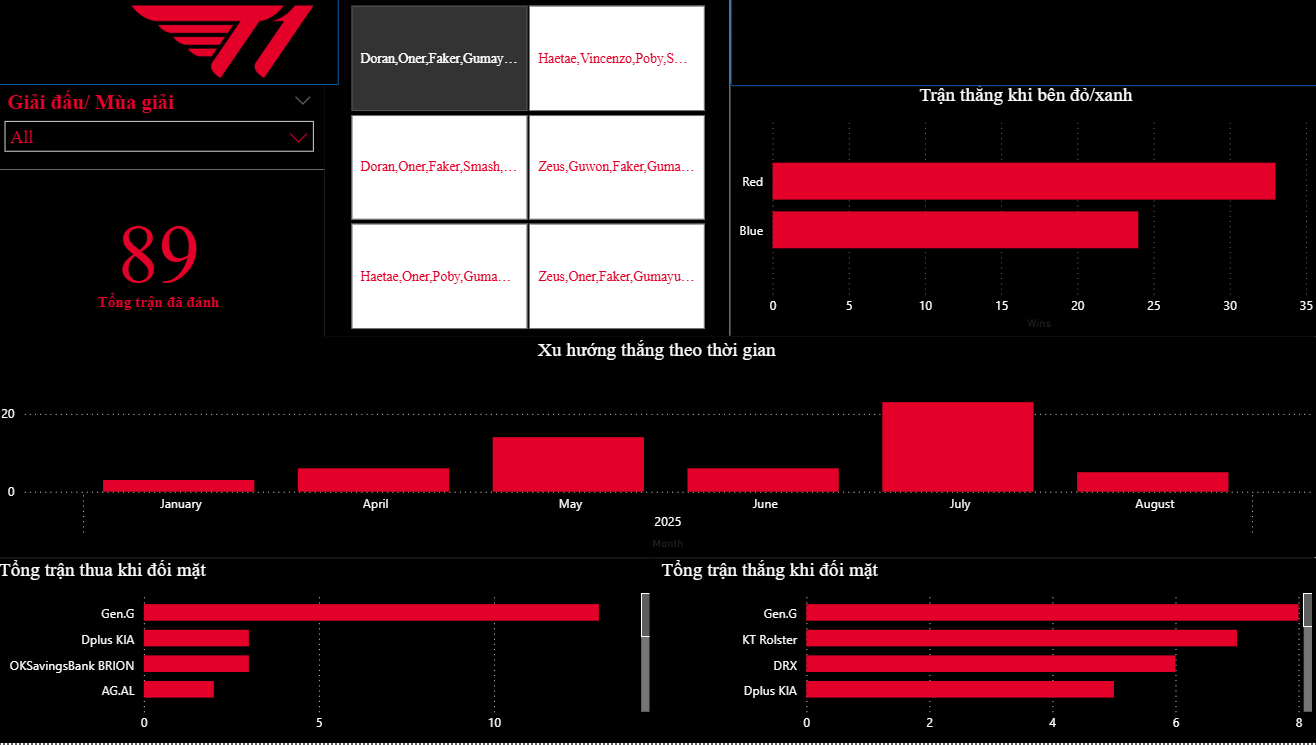